PART 1: THEORETICAL CONCEPTS

In [1]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
import plotly as p
import altair as alt
import bokeh as bk


Question 1: Matplotlib Architecture Briefly explain the relationship between a Figure, an Axes, and an Artist in Matplotlib. Which one is considered the "top-level container"? 
- Figure:
+ Là top-level container trong Matplotlib.
+ Nó đại diện cho toàn bộ khung hình nơi các thành phần đồ họa được vẽ.
+ Một Figure có thể chứa nhiều Axes.

- Axes:
+ Là vùng con bên trong Figure, nơi dữ liệu thực sự được vẽ.
+ Mỗi Axes có hệ tọa độ riêng (x, y) và có thể chứa nhiều loại biểu đồ (line, scatter, bar...).
+ Một Figure có thể có nhiều Axes (ví dụ: subplot).

- Artist:
+ Là mọi đối tượng có thể vẽ được trong Matplotlib.
+ Bao gồm: Line2D, Text, Patch, Image, Legend, Tick…
+ Cả Figure và Axes đều là Artist, nhưng chúng cũng chứa các Artist khác.

Question 2: API Styles Explain the difference between the Stateful (Pyplot) interface and the Object-Oriented interface in Matplotlib. 

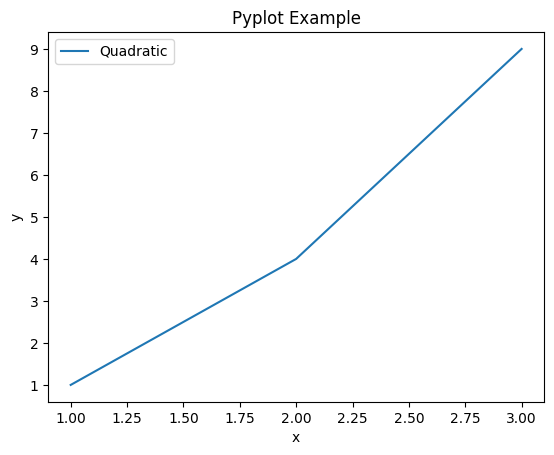

In [2]:
#CODE A:
plt.plot([1, 2, 3], [1, 4, 9], label="Quadratic")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Pyplot Example")
plt.legend()
plt.show()


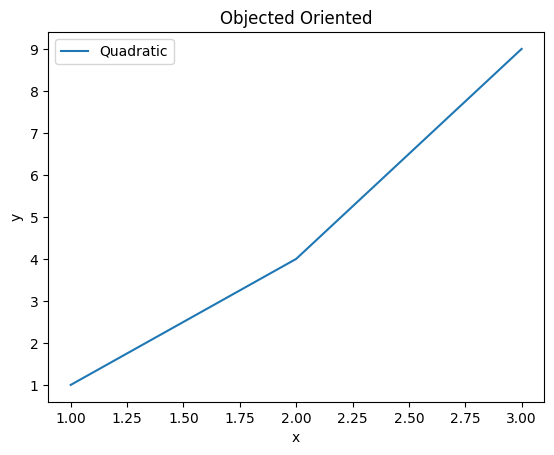

In [3]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [1, 4, 9], label="Quadratic")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title('Objected Oriented')
ax.legend()
plt.show()

# Với "fig, ax = plt.subplots(); ax.plot(x, y)" điều chỉnh được nhiều axes hơn

Question 3: Tool Selection Based on the "Other Python Visualization Tools" section, match the library to its best use case:
1. Matplotlib/Seaborn 
• b. Creating publication-quality static plots for a research paper. 
--> Tạo biểu đồ tĩnh.
2. Plotly/Dash 
• a. Building complex, enterprise-scale interactive dashboards. 
3. Altair 
• c. Statistical graphics with a clean, declarative syntax. 
4. Bokeh 
• d. Real-time streaming data visualization. 

PART 2: PRACTICAL CODING EXERCISES

Exercise 1: Matplotlib Basics

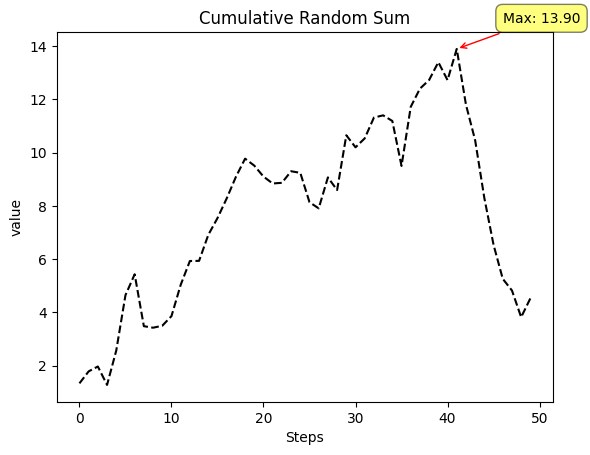

In [5]:
#1. Generate 50 random data points (cumulative sum). 
data=np.random.randn(50).cumsum()
#Object_Oriented API
fig, ax = plt.subplots() 
# Line style should be dashed (--) and color should be black (k). 
ax.plot(data, linestyle="--", color="black")
#3. Add the title "Cumulative Random Sum". 
ax.set_title('Cumulative Random Sum')
#4. Label the x-axis "Steps" and the y-axis "Value". 
ax.set_xlabel('Steps')
ax.set_ylabel('value')
#5. Add a text annotation pointing to the maximum value on the plot using ax.annotate()
max_idx = data.argmax()
max_value = data.max()
ax.annotate(f'Max: {max_value:.2f}', 
            xy=(max_idx, max_value), 
            xytext=(max_idx + 5, max_value + 1),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.5))
plt.show()




Exercise 2: Subplots and Layouts

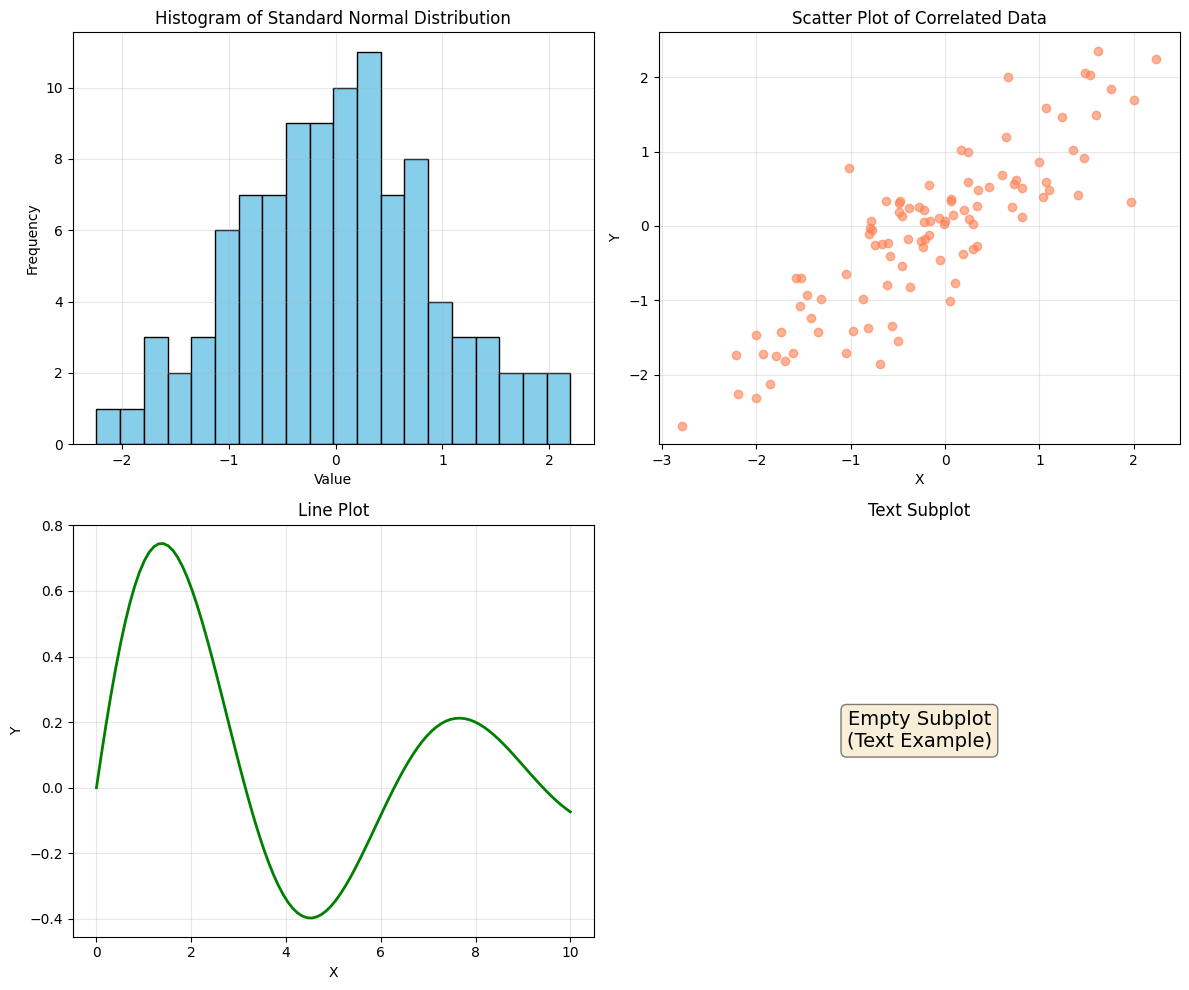

In [6]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Top-Left: Histogram of 100 random numbers from standard normal distribution
data_hist = np.random.randn(100)
axes[0, 0].hist(data_hist, bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Histogram of Standard Normal Distribution')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Top-Right: Scatter plot of two correlated arrays
x_scatter = np.random.randn(100)
y_scatter = x_scatter + 0.5 * np.random.randn(100)  # Correlated with x
axes[0, 1].scatter(x_scatter, y_scatter, alpha=0.6, color='coral')
axes[0, 1].set_title('Scatter Plot of Correlated Data')
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('Y')
axes[0, 1].grid(True, alpha=0.3)

# 3. Bottom-Left: Line plot
x_line = np.linspace(0, 10, 100)
y_line = np.sin(x_line) * np.exp(-x_line/5)
axes[1, 0].plot(x_line, y_line, color='green', linewidth=2)
axes[1, 0].set_title('Line Plot')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Y')
axes[1, 0].grid(True, alpha=0.3)

# 4. Bottom-Right: Simple text
axes[1, 1].text(0.5, 0.5, 'Empty Subplot\n(Text Example)', 
                ha='center', va='center', fontsize=14, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1, 1].set_title('Text Subplot')
axes[1, 1].axis('off')  # Turn off axes for cleaner text display

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Exercise 3: Pandas & Seaborn Integration 

Crosstab data:
sex   Male  Female
day               
Thur    30      32
Fri     10       9
Sat     59      28
Sun     58      18




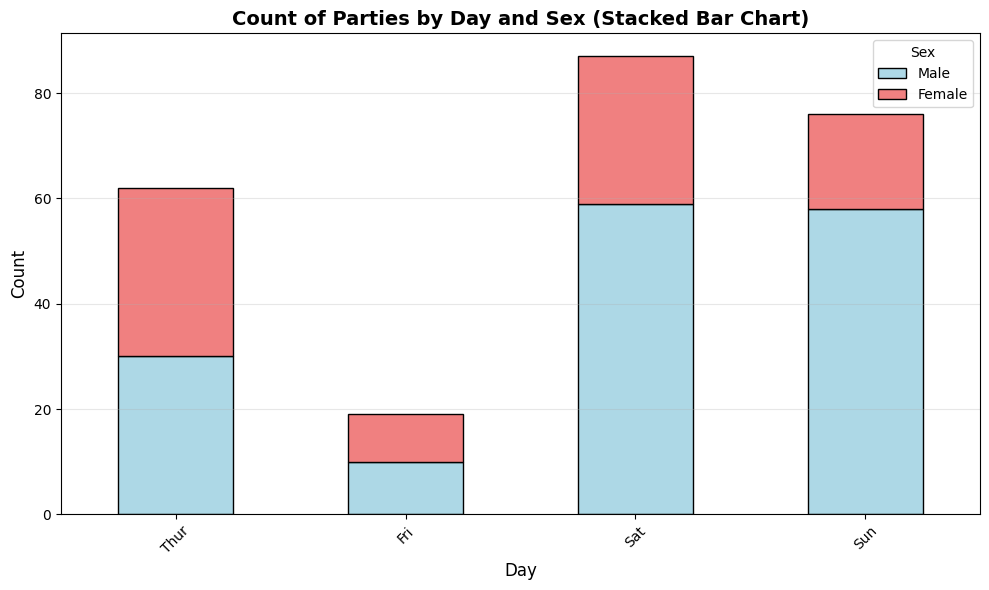

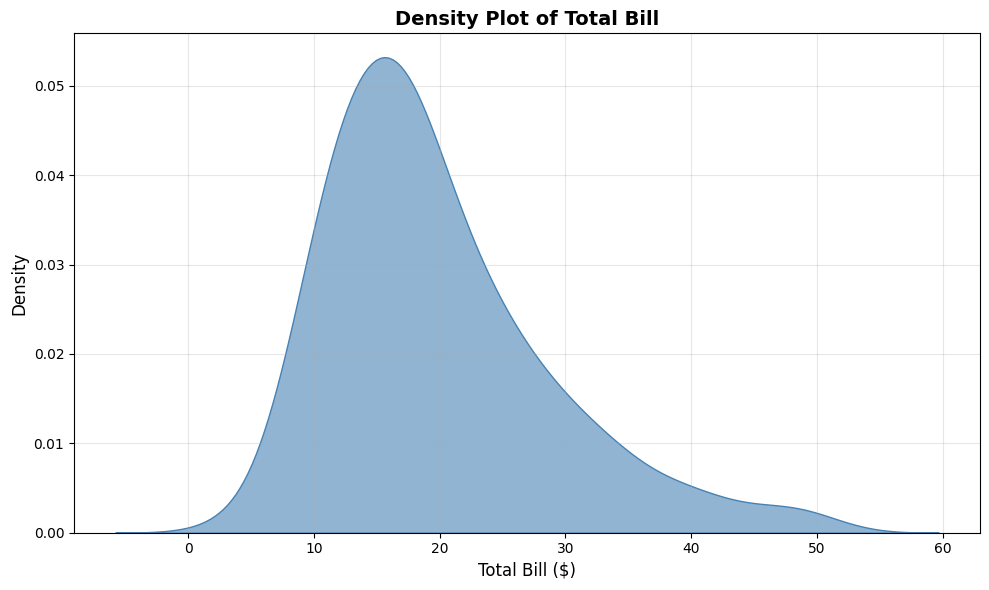

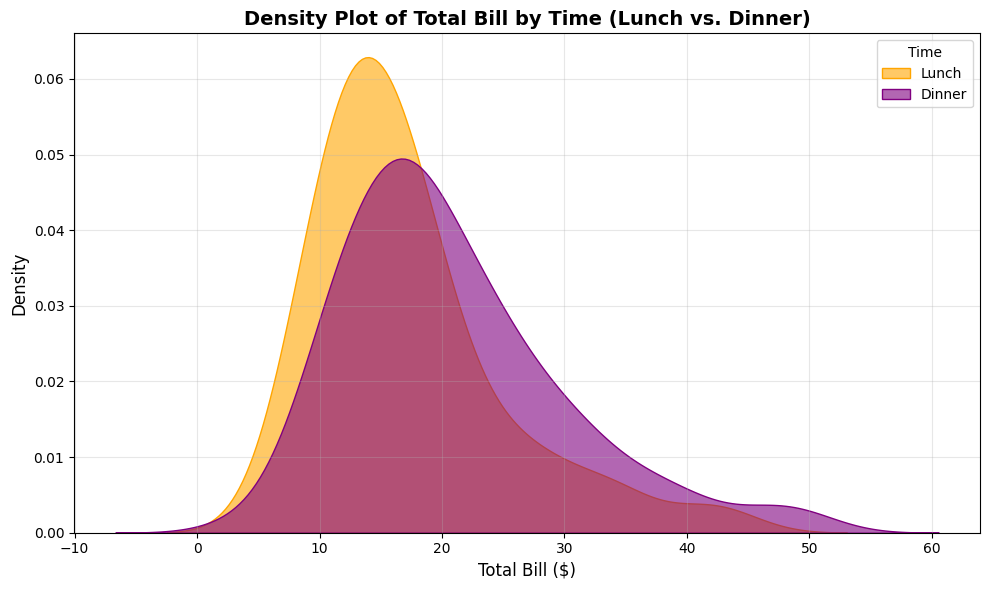

In [7]:
# Load the tips dataset
tips = s.load_dataset('tips')

# 1. Pandas Plotting: Stacked bar chart showing count of parties by day and sex
# Create a crosstab to count parties by day and sex
crosstab_data = pd.crosstab(tips['day'], tips['sex'])
print("Crosstab data:")
print(crosstab_data)
print("\n")

# Create stacked bar chart using pandas plotting
ax1 = crosstab_data.plot(kind='bar', stacked=True, figsize=(10, 6), 
                         color=['lightblue', 'lightcoral'], edgecolor='black')
ax1.set_title('Count of Parties by Day and Sex (Stacked Bar Chart)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Day', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend(title='Sex', title_fontsize=10)
ax1.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Seaborn: Density Plot (kdeplot) of total_bill column
plt.figure(figsize=(10, 6))
s.kdeplot(data=tips, x='total_bill', fill=True, color='steelblue', alpha=0.6)
plt.title('Density Plot of Total Bill', fontsize=14, fontweight='bold')
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Density plot split by time (Lunch vs. Dinner) with different colors
plt.figure(figsize=(10, 6))
s.kdeplot(data=tips[tips['time'] == 'Lunch'], x='total_bill', 
          label='Lunch', fill=True, color='orange', alpha=0.6)
s.kdeplot(data=tips[tips['time'] == 'Dinner'], x='total_bill', 
          label='Dinner', fill=True, color='purple', alpha=0.6)
plt.title('Density Plot of Total Bill by Time (Lunch vs. Dinner)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Time', title_fontsize=10, fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Exercise 4: Advanced Seaborn - Facet Grids 

Box Plot Version:


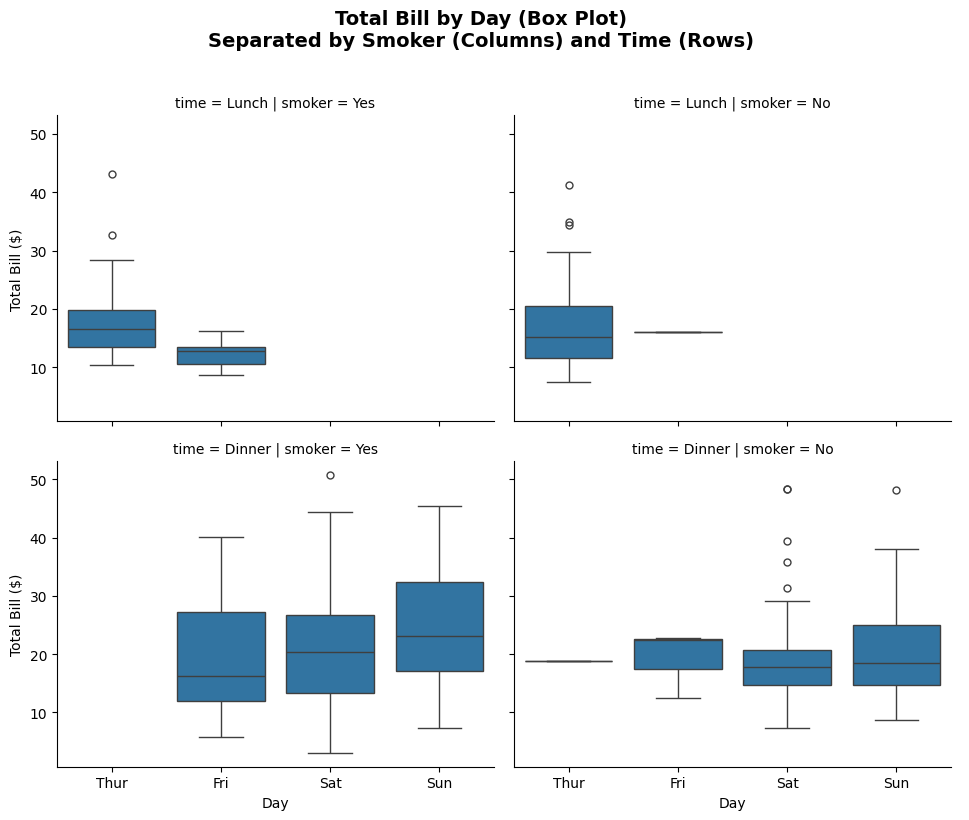


Violin Plot Version:


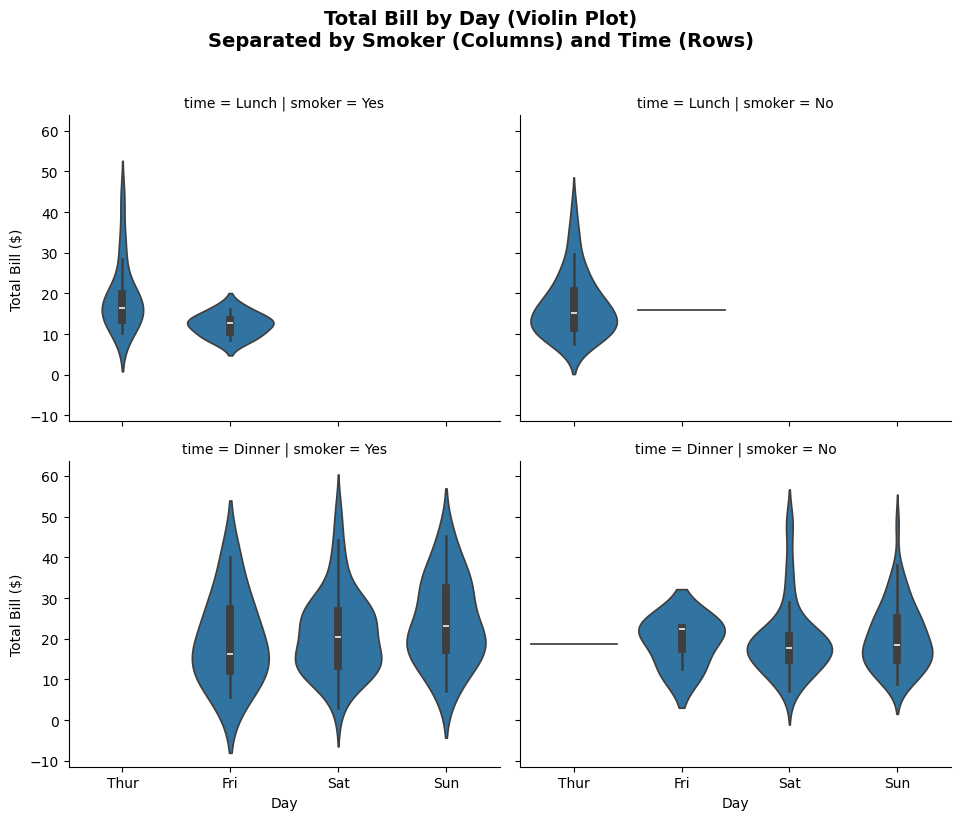

In [10]:
# Using the tips dataset (already loaded in previous cell)
# If tips is not loaded, uncomment the line below:
# tips = s.load_dataset('tips')

# 1. Catplot with Box Plot: total_bill across days, separated by smoker (columns) and time (rows)
print("Box Plot Version:")
g1 = s.catplot(data=tips, x='day', y='total_bill', 
                col='smoker', row='time',
                kind='box', height=4, aspect=1.2)
g1.fig.suptitle('Total Bill by Day (Box Plot)\nSeparated by Smoker (Columns) and Time (Rows)', 
                y=1.02, fontsize=14, fontweight='bold')
g1.set_axis_labels('Day', 'Total Bill ($)')
plt.tight_layout()
plt.show()

# 2. Catplot with Violin Plot: total_bill across days, separated by smoker (columns) and time (rows)
print("\nViolin Plot Version:")
g2 = s.catplot(data=tips, x='day', y='total_bill', 
               col='smoker', row='time',
               kind='violin', height=4, aspect=1.2, inner='box')
g2.fig.suptitle('Total Bill by Day (Violin Plot)\nSeparated by Smoker (Columns) and Time (Rows)', 
                y=1.02, fontsize=14, fontweight='bold')
g2.set_axis_labels('Day', 'Total Bill ($)')
plt.tight_layout()
plt.show()


PART 3: CRITICAL THINKING & ANALYSIS

Question 4: Visualization Critique You are asked to visualize a dataset containing the "Life Expectancy" of 5 different countries over the last 50 years.

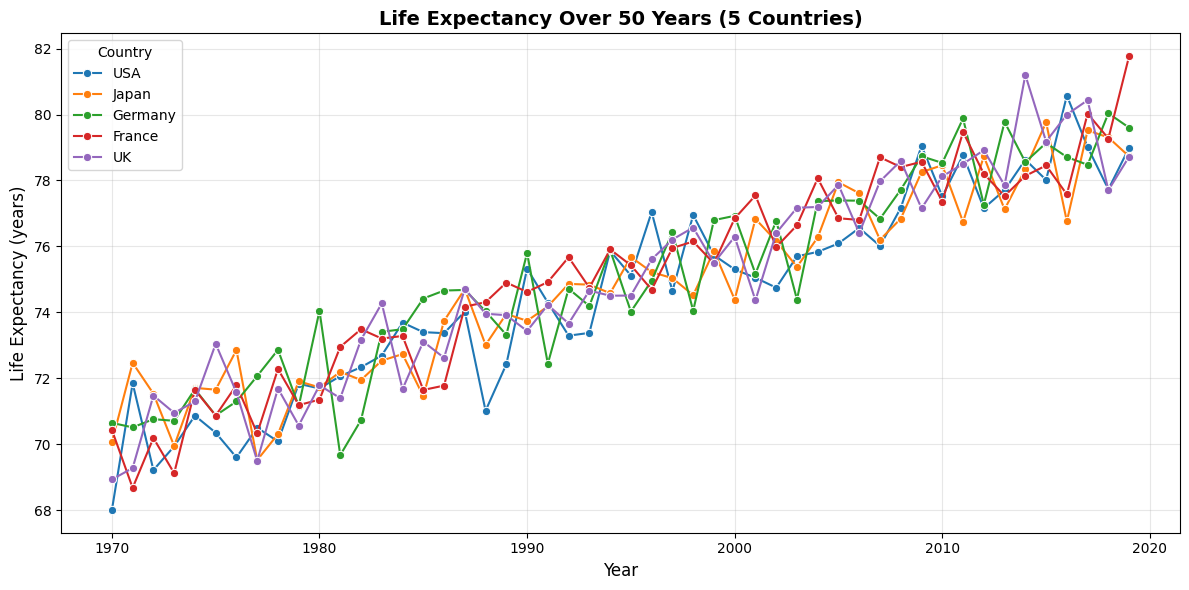

In [12]:
# Question 4: Visualization Critique
# Life Expectancy of 5 countries over 50 years

# 1. Seaborn Implementation (Static Plot)
# Assuming we have a DataFrame with columns: 'Year', 'Country', 'Life_Expectancy'
# Example data structure:
#   Year  Country  Life_Expectancy
#   1970  USA      70.0
#   1970  Japan    72.0
#   ...

# Pseudocode/Code for Seaborn:
import seaborn as s
import matplotlib.pyplot as plt
import pandas as pd

# Create sample data (for demonstration)
years = range(1970, 2020)
countries = ['USA', 'Japan', 'Germany', 'France', 'UK']
data = []
for country in countries:
    for year in years:
        # Simulated life expectancy data (increasing trend)
        base = 70 + (year - 1970) * 0.2
        life_exp = base + np.random.normal(0, 1)
        data.append({'Year': year, 'Country': country, 'Life_Expectancy': life_exp})

df = pd.DataFrame(data)

# Seaborn line plot
plt.figure(figsize=(12, 6))
s.lineplot(data=df, x='Year', y='Life_Expectancy', hue='Country', marker='o')
plt.title('Life Expectancy Over 50 Years (5 Countries)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)
plt.legend(title='Country', title_fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


For interactive charts with hover functionality, use: PLOTLY

Why Plotly?
- Built-in hover tooltips showing exact values
- Interactive features: zoom, pan, select
- Easy to export and share
- Works well in Jupyter notebooks and web dashboards

Syntax Differences:

Seaborn (Static):
  import seaborn as sns
  sns.lineplot(data=df, x='Year', y='Life_Expectancy', hue='Country')

Plotly (Interactive):
  import plotly.express as px
  fig = px.line(df, x='Year', y='Life_Expectancy', color='Country',
                hover_data=['Year', 'Life_Expectancy'])
  fig.update_traces(mode='lines+markers')
  fig.show()
...
#     yaxis_title='Life Expectancy (years)',
#     hovermode='x unified'  # Shows all values at same x position
# fig.show()

Question 5: Saving Results When saving a plot using plt.savefig(), what is the purpose of the dpi and bbox_inches parameters? Why might bbox_inches='tight' be useful? 

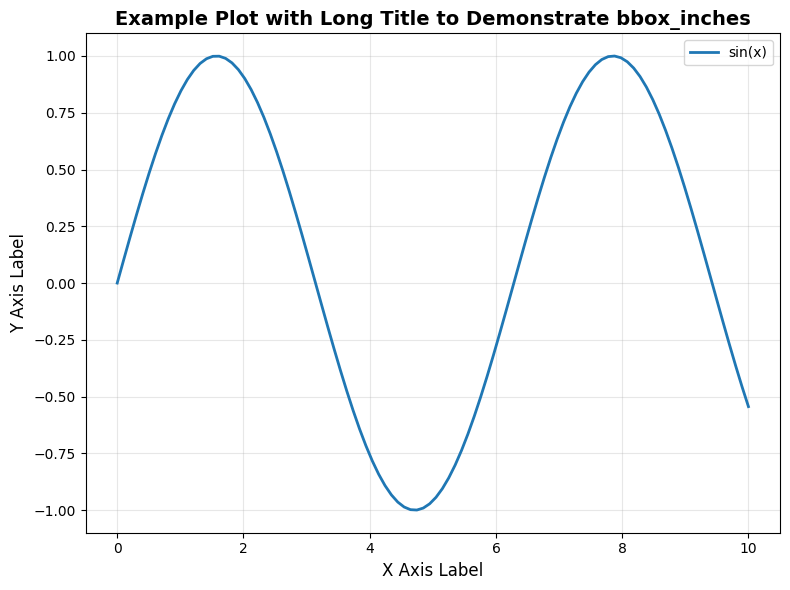

In [14]:
# Create a sample plot to demonstrate
fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(0, 10, 100)
y = np.sin(x)
ax.plot(x, y, linewidth=2, label='sin(x)')
ax.set_xlabel('X Axis Label', fontsize=12)
ax.set_ylabel('Y Axis Label', fontsize=12)
ax.set_title('Example Plot with Long Title to Demonstrate bbox_inches', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
# Demonstrate saving (commented out to avoid creating files)
# plt.savefig('example_default.png', dpi=100)
# plt.savefig('example_tight.png', dpi=300, bbox_inches='tight')
# print("\n✓ Files saved! Compare 'example_default.png' vs 'example_tight.png'")

plt.show()


1. DPI PARAMETER (dpi)
======================================================================

DPI stands for 'Dots Per Inch' - it controls the resolution of the saved image.

Purpose:
- Higher DPI = Higher resolution = Sharper image, larger file size
- Lower DPI = Lower resolution = Blurrier image, smaller file size
- Default DPI is usually 100

Common DPI values:
- 72-100 DPI: For web/screen display (smaller files)
- 150-200 DPI: For presentations (good balance)
- 300+ DPI: For print/publication quality (large files)

Example:
  plt.savefig('plot.png', dpi=100)  # Standard quality
  plt.savefig('plot.png', dpi=300)  # High quality for printing

======================================================================
2. BBOX_INCHES PARAMETER
======================================================================

Bbox_inches controls how much whitespace/empty area is included around the plot.
...
   plt.savefig('plot_tight.png', dpi=300, bbox_inches='tight')

3. Best practice for publications:
   plt.savefig('plot_publication.png', dpi=300, bbox_inches='tight', facecolor='white')

   SUMMARY:
======================================================================

• dpi: Controls image resolution (higher = sharper but larger files)
• bbox_inches='tight': Automatically removes whitespace, ensures all
  elements are visible, produces cleaner output

Best Practice:
  plt.savefig('filename.png', dpi=300, bbox_inches='tight')
  → High quality, no whitespace, publication-ready